## Basic Ruleset:

- Each player starts with **seven** cards
- Players take turns discard **one** card which suit or rank matches the top card of the discard pile, or **8**s
- When a player plays an **8**, they can declare a suit. The next player must follow suit, or play another **8**
- When a player is unable to play, they must draw from the drawing stack up to a maximum of **three** cards until they are able to play. If they are still unable to play after drawing three cards, they must pass
- Players can draw at anytime, even when they have playable cards
- If the drawing stack is exhausted, all the discarded cards except the top card is reshuffled to form a new drawing stack

## Reduced Ruleset:

Same as Basic, except...
- When a player plays an **8**, they do **not** declare suits. Instead the next player follows the suit of the **8** card played
- When a player is unable to play, they must draw **one** card and pass their turn

## Variant Ruleset

Same as Basic, with additional special cards:

- When a **2** is played, the next player draws **two** cards and misses their turn, unless they counter with another **2**, in which case the effect stacks and is applied onto the next player
- When a **Q** is played, the next player misses their turn
- When an **A** is played, the direction of play reverses. This has no effect on 2-player games

# Experimental Results

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os.path as path
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.dpi"] = 140

# Constants
_dir = ''
rand = 'random'
btr = 'better_random'
o = 'oracle'
rl = 'rl'
ismcts = 'ismcts'

indices = ['Random', 'Better Random', 'Oracle', 'RL', 'ISMCTS']
cols = ['Random', 'Better Random', 'Oracle', 'RL', 'ISMCTS']


def wr(agent1: str, agent2: str) -> float:
	'''
	Gets the win rate of agent1 when played against agent2.
	agent1 always goes first.
	'''
	_path = f'{_dir}{agent1}_vs_{agent2}.csv'
	if not path.exists(_path):
		return np.nan
	results = pd.read_csv(_path).iloc[-1]
	return results[0]/sum(results)*100

def get_win_rates(dir: str, randomized: bool = False) -> pd.DataFrame:
	global _dir
	_dir = dir
	data: pd.DataFrame
	if randomized:
		data = np.array([
			[wr(rand,   rand), np.nan,          np.nan,        np.nan,         np.nan            ],
			[wr(btr,    rand), wr(btr,    btr), np.nan,        np.nan,         np.nan            ],
			[wr(o,      rand), wr(o,      btr), wr(o,      o), np.nan,         np.nan            ],
			[wr(rl,     rand), wr(rl,     btr), wr(rl,     o), wr(rl,     rl), np.nan            ],
			[wr(ismcts, rand), wr(ismcts, btr), wr(ismcts, o), wr(ismcts, rl), wr(ismcts, ismcts)]
		])
	else:
		data = np.array([
			[wr(rand,   rand), wr(rand,   btr), wr(rand,   o), wr(rand,   rl), wr(rand,   ismcts)],
			[wr(btr,    rand), wr(btr,    btr), wr(btr,    o), wr(btr,    rl), wr(btr,    ismcts)],
			[wr(o,      rand), wr(o,      btr), wr(o,      o), wr(o,      rl), wr(o,      ismcts)],
			[wr(rl,     rand), wr(rl,     btr), wr(rl,     o), wr(rl,     rl), wr(rl,     ismcts)],
			[wr(ismcts, rand), wr(ismcts, btr), wr(ismcts, o), wr(ismcts, rl), wr(ismcts, ismcts)]
		])
	return pd.DataFrame(data, index=indices, columns=cols)
	

## Reduced Ruleset

Text(909.5833333333334, 0.5, 'Agent 1')

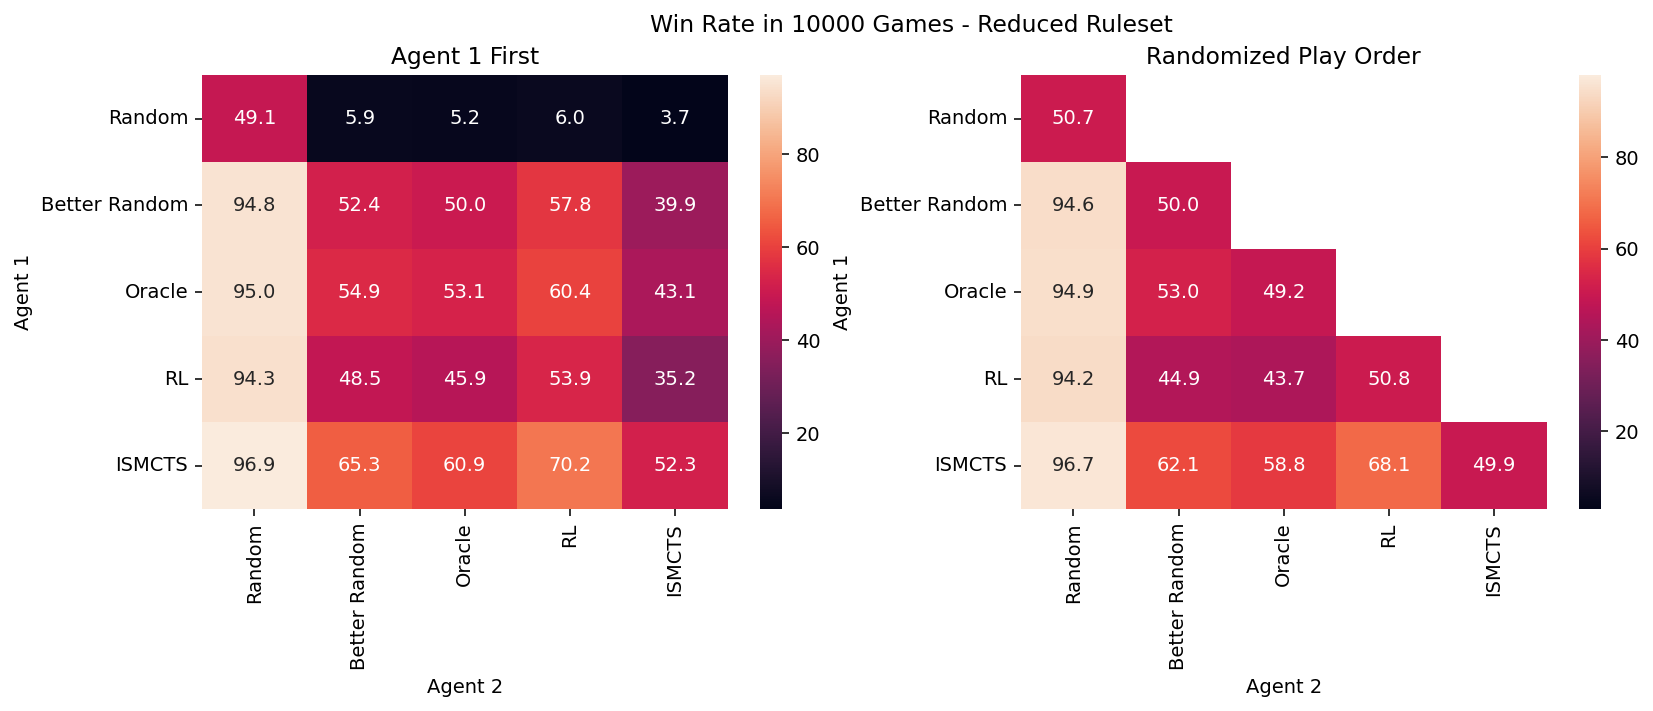

In [9]:
df = get_win_rates('reduced/2p/1v1/')
df2 = get_win_rates('reduced/2p/1v1_randomized/', randomized=True)

fig, axes = plt.subplots(1, 2)
plt.suptitle('Win Rate in 10000 Games - Reduced Ruleset')
fig.tight_layout()
fig.set_size_inches(12, 4)

ax = sns.heatmap(df, annot=True, fmt='.1f', ax=axes[0])
ax.set_title('Agent 1 First')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')

ax = sns.heatmap(df2, annot=True, fmt='.1f', ax=axes[1], vmin=3, vmax=98)
ax.set_title('Randomized Play Order')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')

## Basic Ruleset

Text(909.5833333333334, 0.5, 'Agent 1')

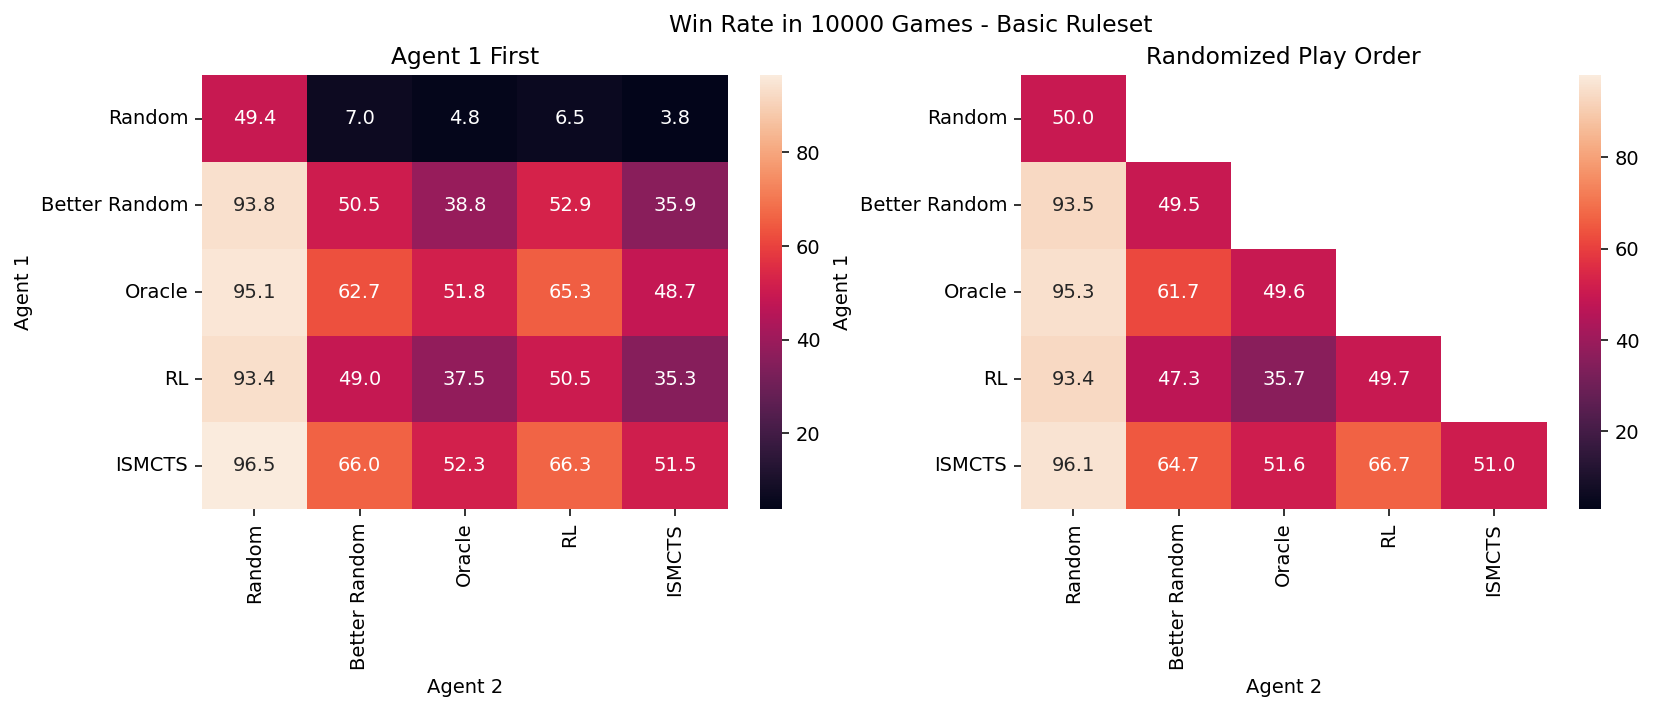

In [10]:
df = get_win_rates('basic/2p/1v1/')
df2 = get_win_rates('basic/2p/1v1_randomized/', randomized=True)

fig, axes = plt.subplots(1, 2)
plt.suptitle('Win Rate in 10000 Games - Basic Ruleset')
fig.tight_layout()
fig.set_size_inches(12, 4)


ax = sns.heatmap(df, annot=True, fmt='.1f', ax=axes[0])
ax.set_title('Agent 1 First')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')

ax = sns.heatmap(df2, annot=True, fmt='.1f', ax=axes[1], vmin=3, vmax=98)
ax.set_title('Randomized Play Order')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')

## Variant Ruleset

Text(909.5833333333334, 0.5, 'Agent 1')

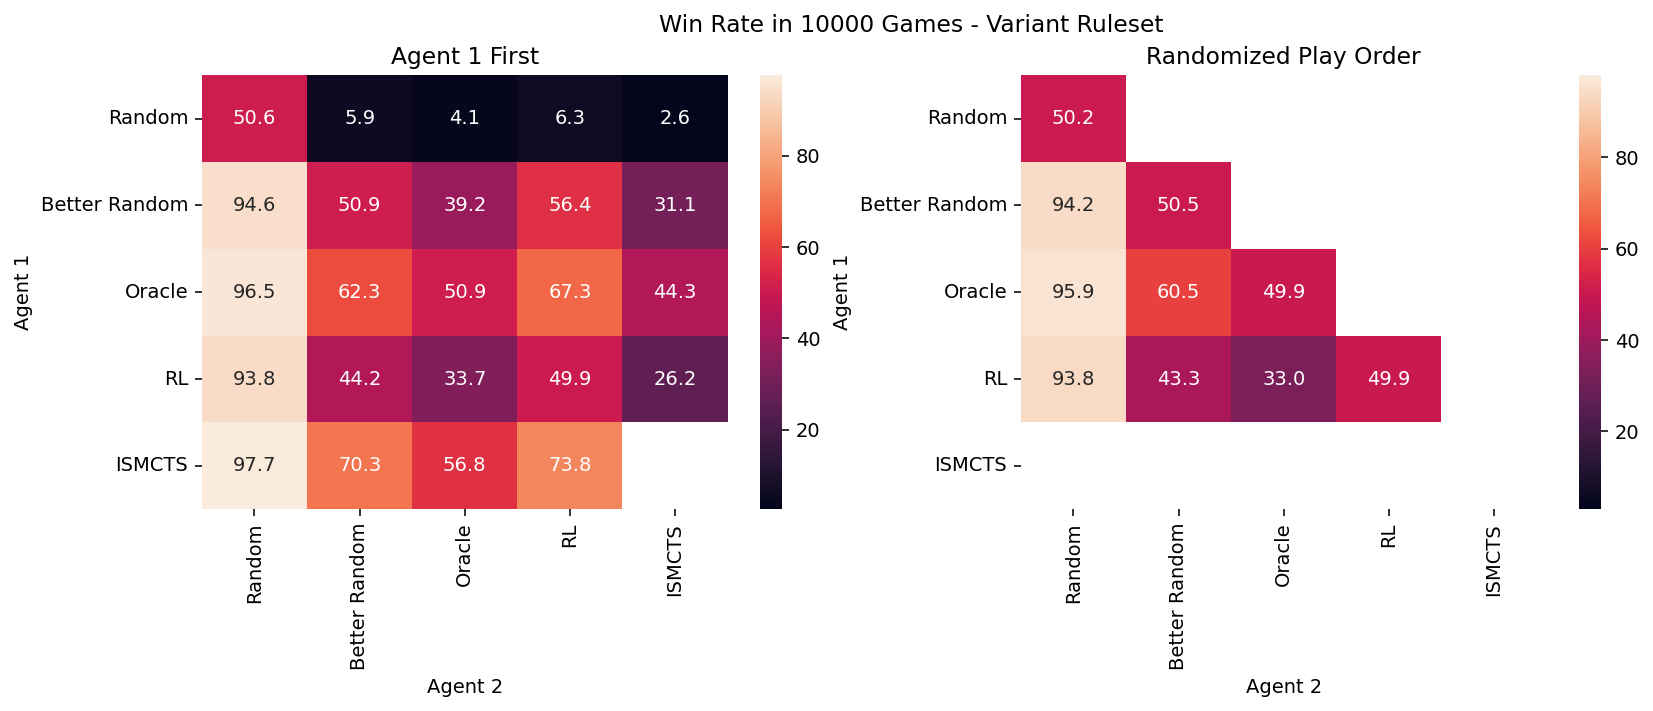

In [15]:
df = get_win_rates('variant/2p/1v1/')
df2 = get_win_rates('variant/2p/1v1_randomized/', randomized=True)

fig, axes = plt.subplots(1, 2)
plt.suptitle('Win Rate in 10000 Games - Variant Ruleset')
fig.tight_layout()
fig.set_size_inches(12, 4)


ax = sns.heatmap(df, annot=True, fmt='.1f', ax=axes[0])
ax.set_title('Agent 1 First')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')

ax = sns.heatmap(df2, annot=True, fmt='.1f', ax=axes[1], vmin=3, vmax=98)
ax.set_title('Randomized Play Order')
ax.set_xlabel('Agent 2')
ax.set_ylabel('Agent 1')